# Real Estate Clean up

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [16]:
import pandas as pd

# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('real_estate.csv', sep=';')


#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [17]:
ds_sorted = ds.sort_values(by='price', ascending=False)
most_expensive_address = ds_sorted.iloc[0]['address']
most_expensive_price = ds_sorted.iloc[0]['price']

print(f"The house with address {most_expensive_address} is the most expensive and its price is {most_expensive_price} USD")

The house with address El Escorial is the most expensive and its price is 8500000 USD


#### Exercise 02. Which is cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [18]:
# Sorting the dataset and saving the value with the lowest price != 0
ds_sorted = ds.sort_values(by='price', ascending=True)

least_expensive_address = ds_sorted[ds_sorted['price']>0].iloc[0]['address']
least_expensive_price = ds_sorted[ds_sorted['price']>0].iloc[0]['price']

print(f"The house with address {least_expensive_address} is the cheapest and its price is {least_expensive_price} USD")


The house with address Berlin, Coslada is the cheapest and its price is 600 USD


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The bigger house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smaller house is located on County Road 1 N and its surface is 200 meters`

In [20]:
ds_sorted_big = ds.sort_values(by='surface', ascending=False)
ds_sorted_small = ds.sort_values(by='surface', ascending=True)

big_address = ds_sorted_big.iloc[0]['address']
big_surface = ds_sorted_big.iloc[0]['surface']

small_address = ds_sorted_small.iloc[0]['address']
small_surface = ds_sorted_small.iloc[0]['surface']

print(f"The bigger house is located on {big_address} and its surface is {big_surface} meters")
print(f"The samller house is located on {small_address} and its surface is {small_surface} meters")

The bigger house is located on Sevilla la Nueva and its surface is 249000.0 meters
The samller house is located on Calle Amparo,  Madrid Capital and its surface is 15.0 meters


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the name of the populations with comma as separator. For example:

`> print(populations)`

`population1, population2, population3,...`

In [21]:
# List -> set -> list removes duplicates
populations_list = ds['level5'].tolist() # Could also have used unique() method
populations_set = set(populations_list)
populations_list = list(populations_set)
print(f"There are {len(populations_list)} diferent populations and those are: {populations_list}")

There are 168 diferent populations and those are: ['Pezuela de las Torres', 'Manzanares El Real', 'Pozuelo de Alarcón', 'El Berrueco', 'Navalafuente', 'Robledo de Chavela', 'Lozoyuela-navas-sieteiglesias', 'Fuentidueña de Tajo', 'Lozoya', 'Getafe', 'Tielmes', 'Villanueva de Perales', 'Braojos', 'Arganda del Rey', 'Cercedilla', 'Fresno de Torote', 'Valdemorillo', 'Valdemaqueda', 'Ribatejada', 'Moralzarzal', ' Madrid Capital', 'Torres de la Alameda', 'Quijorna', 'Hoyo de Manzanares', 'Batres', 'Valdemanco', 'Colmenar Viejo', 'La Cabrera', 'El Boalo - Cerceda – Mataelpino', 'Talamanca de Jarama', 'San Lorenzo de El Escorial', 'Fresnedillas de la Oliva', 'Pinilla del Valle', 'Moraleja de Enmedio', 'Valverde de Alcalá', 'Villa del Prado', 'Ambite', 'Titulcia', 'Cobeña', 'Brea de Tajo', 'Torrelaguna', 'Leganés', 'Colmenarejo', 'Aldea del Fresno', 'Venturada', 'Los Santos de la Humosa', 'Villalbilla', 'Coslada', 'Majadahonda', 'Cabanillas de la Sierra', 'Ciempozuelos', 'Belmonte de Tajo', 'Tr

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`true` or `fase`) followed by the rows/cols that contains NAs.

In [22]:
contain_na = ds.isna().any().any()
print(f"Does the dataset contain NAs? : ", contain_na)
for column in ds.columns:
    if ds[column].isna().any():
        print(f"Column '{column}' contains NaN values")

ds.describe()

Does the dataset contain NAs? :  True
Column 'realEstate_name' contains NaN values
Column 'phone_realEstate' contains NaN values
Column 'rooms' contains NaN values
Column 'bathrooms' contains NaN values
Column 'surface' contains NaN values
Column 'description' contains NaN values
Column 'level4' contains NaN values
Column 'level6' contains NaN values
Column 'level7' contains NaN values
Column 'level8' contains NaN values
Column 'zipCode' contains NaN values
Column 'customZone' contains NaN values


,Unnamed: 0,id_realEstates,phone_realEstate,rooms,bathrooms,surface,price,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,zipCode,customZone
count,15335.000000,1.533500e+04,1.454100e+04,14982.000000,14990.000000,14085.000000,1.533500e+04,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.000000,0.0,0.0
mean,7668.000000,1.524371e+08,9.143423e+08,3.231611,2.150233,196.916436,4.773036e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166873,NaN,NaN
std,4426.977524,2.277286e+06,7.516036e+06,1.393106,1.292079,2182.758313,5.912942e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.372875,NaN,NaN
min,1.000000,1.221584e+08,8.762742e+08,1.000000,1.000000,15.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
25%,3834.500000,1.519456e+08,9.113649e+08,2.000000,1.000000,80.000000,1.690000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
50%,7668.000000,1.532413e+08,9.121841e+08,3.000000,2.000000,114.000000,2.800000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
75%,11501.500000,1.538105e+08,9.148904e+08,4.000000,3.000000,205.000000,5.400000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
max,15335.000000,1.540033e+08,9.887761e+08,30.000000,20.000000,249000.000000,8.500000e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,NaN,NaN


#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions

In [23]:
na_full_columns = []

# Find columns with only NaN values
for column in ds.columns:
    if ds[column].isna().all():
        na_full_columns.append(column)

# Remove columns with only NaN values
ds_drop = ds.drop(na_full_columns, axis=1)

# Fill NaN with 0's
ds_filled = ds_drop.fillna(0)

full_0_columns = []

# Find all columns with only 0's on them
for column in ds_filled.columns:
    if all(value == 0 for value in ds_filled[column]):
        full_0_columns.append(column)

# Remove columns with only 0's 
ds_clean = ds_filled.drop(full_0_columns, axis=1)

# Convert longitude and latitude columns from str to float, first replacing all ',' with '.'
ds_clean['latitude'] = ds_clean['latitude'].str.replace(',','.')
ds_clean['longitude'] = ds_clean['longitude'].str.replace(',','.')

ds_clean['latitude'] = ds_clean['latitude'].astype(float)
ds_clean['longitude'] = ds_clean['longitude'].astype(float)

# Remove all rows with price, surface == 0 and with latitude & longitude if both are == 0
ds_clean = ds_clean[(ds_clean['price'] != 0) & (ds_clean['surface'] != 0) & ~((ds_clean['latitude'] == 0) & (ds_clean['longitude'] == 0))]


print("Before removing NA columns: ", ds.shape)
print("After: ", ds_clean.shape)



Before removing NA columns:  (15335, 37)
After:  (14016, 26)


#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value

In [24]:
ds_arroyomolinos = ds_clean[ds_clean['level5'] == 'Arroyomolinos (Madrid)']
 
print(f"The mean of prices in Arroyomolinos (Madrid) is", round(ds_arroyomolinos['price'].mean(),2))

The mean of prices in Arroyomolinos (Madrid) is 299892.69


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

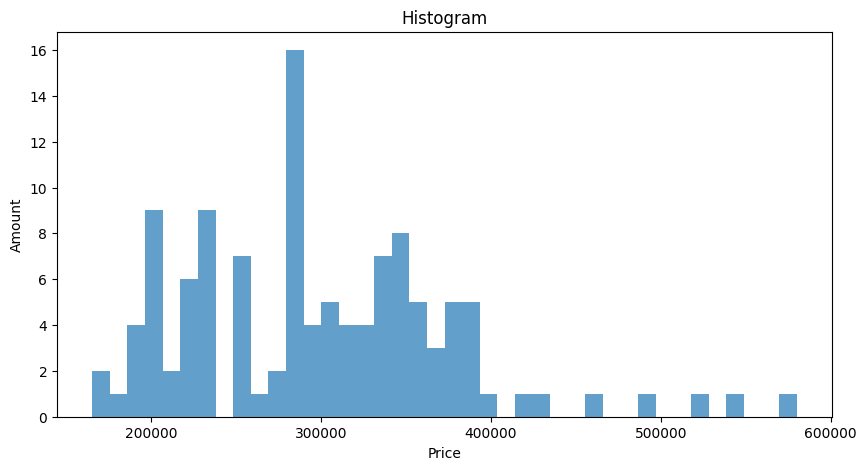

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))

plt.hist(ds_arroyomolinos['price'], bins = 40, alpha = 0.7)

plt.title("Histogram")
plt.xlabel("Price")
plt.ylabel("Amount")
plt.show()

We can observe that most of the houses are within the $200k-$400k range, specifically around $290k which makes a lot of sense since the average price on this place is ~$295k. There are also a few outliers going up to almost $600k and a couple selling for free.

#### Exercise 09. Are the averages of "Valdemorillo" and "Galapagar" prices the same? (★★☆)

Print the both average prices and then write a conclusion about them

In [26]:

ds_valdemorillo = ds_clean[ds_clean['level5'] == 'Valdemorillo']
ds_galapagar = ds_clean[ds_clean['level5'] == 'Galapagar']

print(f"Average of Valdemorillo: {round(ds_valdemorillo['price'].mean(),2)}")
print(f"Average of Galapagar: {round(ds_galapagar['price'].mean(),2)}")

Average of Valdemorillo: 371583.02
Average of Galapagar: 372108.65


They're about the same average price.

#### Exercise 10. Are the averages of "Valdemorillo" and "Galapagar" price per square meter (price/m2) the same? (★★☆)

Print the both average prices and then write a conclusion about

Hint: Create a new column called `pps` (price per square) and then analyse the values

In [27]:
import numpy as np

# Create new column pps = price/surface with exception to replace 0's with NaN to avoid inf outputs
ds_valdemorillo['pps'] = ds_valdemorillo['price'] / ds_valdemorillo['surface']
ds_galapagar['pps'] = ds_galapagar['price'] / ds_galapagar['surface']

C:\Users\rakus\AppData\Local\Temp\ipykernel_18532\1112423543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_valdemorillo['pps'] = ds_valdemorillo['price'] / ds_valdemorillo['surface']
C:\Users\rakus\AppData\Local\Temp\ipykernel_18532\1112423543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_galapagar['pps'] = ds_galapagar['price'] / ds_galapagar['surface']


In [28]:
print(f"Valdemorillo pps average: {round(ds_valdemorillo['pps'].mean(),2)} with {len(ds_valdemorillo['price'])} different houses")
print(f"Galapagar pps average: {round(ds_galapagar['pps'].mean(),2)} with {len(ds_galapagar['price'])} different houses")

Valdemorillo pps average: 1317.95 with 53 different houses
Galapagar pps average: 1606.32 with 75 different houses


#### Exercise 11. Analyse the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot` and then write a conclusion about it

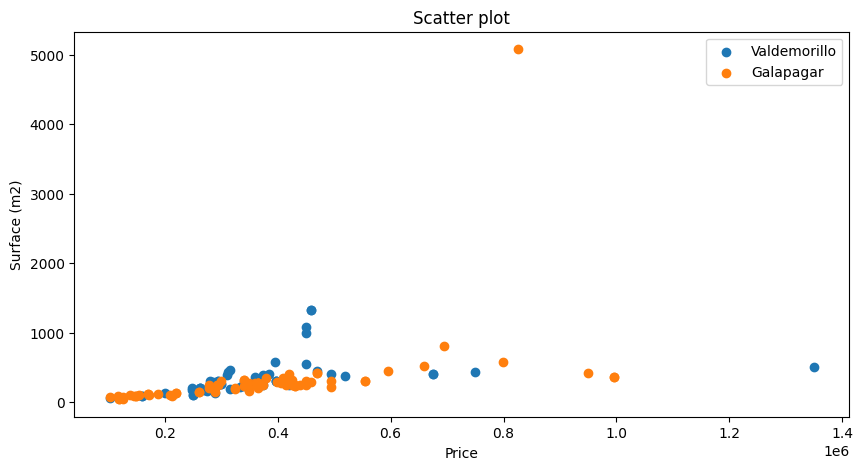

In [29]:
# Create plot
plt.figure(figsize = (10, 5))

# Add data
plt.scatter(ds_valdemorillo['price'], ds_valdemorillo['surface'], label = "Valdemorillo")
plt.scatter(ds_galapagar['price'], ds_galapagar['surface'], label = "Galapagar")

plt.title("Scatter plot")
plt.xlabel("Price")
plt.ylabel("Surface (m2)")
plt.legend()
plt.show()

As we can see, the avg price of the houses in Galapagar is higher but the houses in Valdemorillo are, in average, larger. Specially if we do ignore both outliers (~$1.4m Valdemorillo's house and 5000m2 Galapagar's house)



#### Exercise 12. How many real estate agencies the dataset contains? (★★☆)

Print the obtained value

In [30]:
print(f"There are {len(ds_clean['realEstate_name'].unique())} diferent real state agencies")

There are 1704 diferent real state agencies


#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses

In [31]:
duplicates = ds_clean['level5'].value_counts()

most_common = duplicates.idxmax()
most_common_count = duplicates.max()

print(f"The most common population is {most_common} with {most_common_count} houses")

The most common population is  Madrid Capital with 6228 houses


#### Exercise 14. Now let's work with the "south belt" of madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`

In [32]:
ds_southbelt = ds_clean[ds_clean['level5'].isin(['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'])]

#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in the question 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot

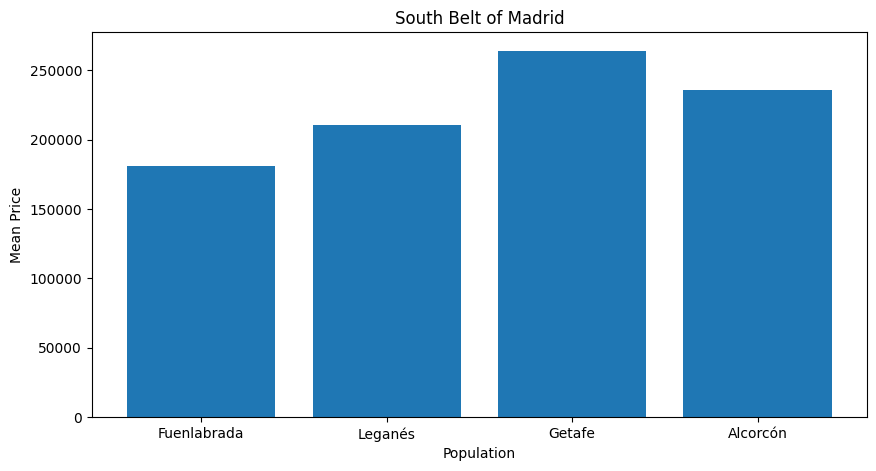

In [33]:
pop = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']

def get_mean_southbelt(col):
    values = []
    
    for n in pop:
        ds_aux = ds_southbelt[ds_southbelt['level5'] == n]
        values.append(round(ds_aux[col].mean(), 3))
    return values

plt.figure(figsize = (10, 5))

plt.bar(pop, get_mean_southbelt('price'))

plt.title("South Belt of Madrid")
plt.xlabel("Population")
plt.ylabel("Mean Price")
plt.show()

We can observe that, in descending order, the average price of a house in Madrid South Belt population is: Getafe, Alcorcón, Leganés and Fuenlabrada

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in the question 14) (★★★)

Print both values for each variable

In [34]:
def get_variance_southbelt(df : pd.DataFrame, column_check : pd.Series, mean_value : float):
    # variance = (Sum((data_list - mean_value) ** 2))/n_elements
    variance = ((df[column_check] - mean_value) ** 2).sum() / len(df)
    return round(variance, 3)


cols_to_get = ['price', 'rooms', 'surface', 'bathrooms'] # columnas donde queremos saber la media y/o varianza


aux = 0 # Para saber en qué columna estamos
for col in cols_to_get:
    mean_v = get_mean_southbelt(col) # conseguimos la media y la guardamos
    variance_v = get_variance_southbelt(ds, col, mean_v[aux]) # conseguimos la varianza, miramos la media en mean_v[aux] donde aux es la posición del vector que coincide con cols_to_get siempre
    print(f"The mean {col} is {mean_v[aux]} and the variance is {variance_v}") # imprimimos por pantalla
    aux+=1 # We move to next cols_to_get index

The mean price is 180955.426 and the variance is 16464631243.837
The mean rooms is 2.892 and the variance is 0.747
The mean surface is 121.146 and the variance is 4203.721
The mean bathrooms is 1.622 and the variance is 0.583


#### Exercise 17. What is the most expensive house of each population? You must use the subset obtained in the question 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population

In [35]:
# pop = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']

def get_max(df, col): # Averiguar el valor mas alto de la columna del df
    index_values = []
    
    for n in pop:
        df_aux = df[df['level5'] == n]
        index_values.append(df_aux[col].idxmax())
    return index_values # lista con indices de las casas con los valores maximos respectivamente de cada pop

max_price_index = get_max(ds_southbelt, 'price') # Cogemos los indices donde el precio es máximo respecto a cada población

print(max_price_index)
ds_southbelt.loc[max_price_index] # muestra las filas y necesita como argumento los indices

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level3,level4,level5,level6,level7,level8,upperLevel,accuracy,latitude,longitude
11561,11562,153660921,False,unna madrid,912780846.0,https://www.fotocasa.es/es/comprar/vivienda/va...,4.0,3.0,274.0,490000,...,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,0,Universidad - Hospital en Fuenlabrada,0,Universidad - Hospital en Fuenlabrada,1,40.282860,-3.814750
10412,10413,152251506,False,bafre gestion y servicios inmobiliarios,910752245.0,https://www.fotocasa.es/es/comprar/vivienda/co...,6.0,5.0,360.0,650000,...,Zona Sur de Madrid,"Leganés, Zona de",Leganés,0,Leganés Norte,0,Leganés Norte,0,40.342364,-3.748144
2881,2882,151105544,False,unna grupo inmobiliario,912665694.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,6.0,4.0,600.0,1050000,...,Zona Sur de Madrid,"Getafe, Zona de",Getafe,0,San Isidro,0,San Isidro,0,40.302820,-3.728170
5585,5586,153275915,False,100 home red inmobiliaria,912669623.0,https://www.fotocasa.es/es/comprar/vivienda/ca...,6.0,6.0,722.0,950000,...,Zona Suroeste,"Alcorcón, Zona de",Alcorcón,0,Campodón - Ventorro del Cano,0,Campodón - Ventorro del Cano,0,40.353517,-3.866468


#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in the question 14) (★★★)

For the normalization method you can use the one you consider to, there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot

Hint: You can help yourself reviewing the multihist demo of Matplotlib

C:\Users\rakus\AppData\Local\Temp\ipykernel_18532\307218967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_southbelt['normalized_prices'] = ds_southbelt.groupby('level5')['price'].transform(normalize)


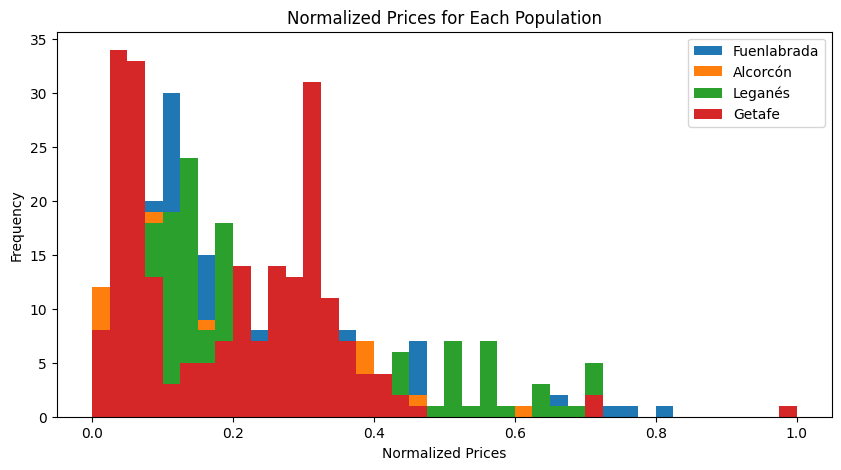

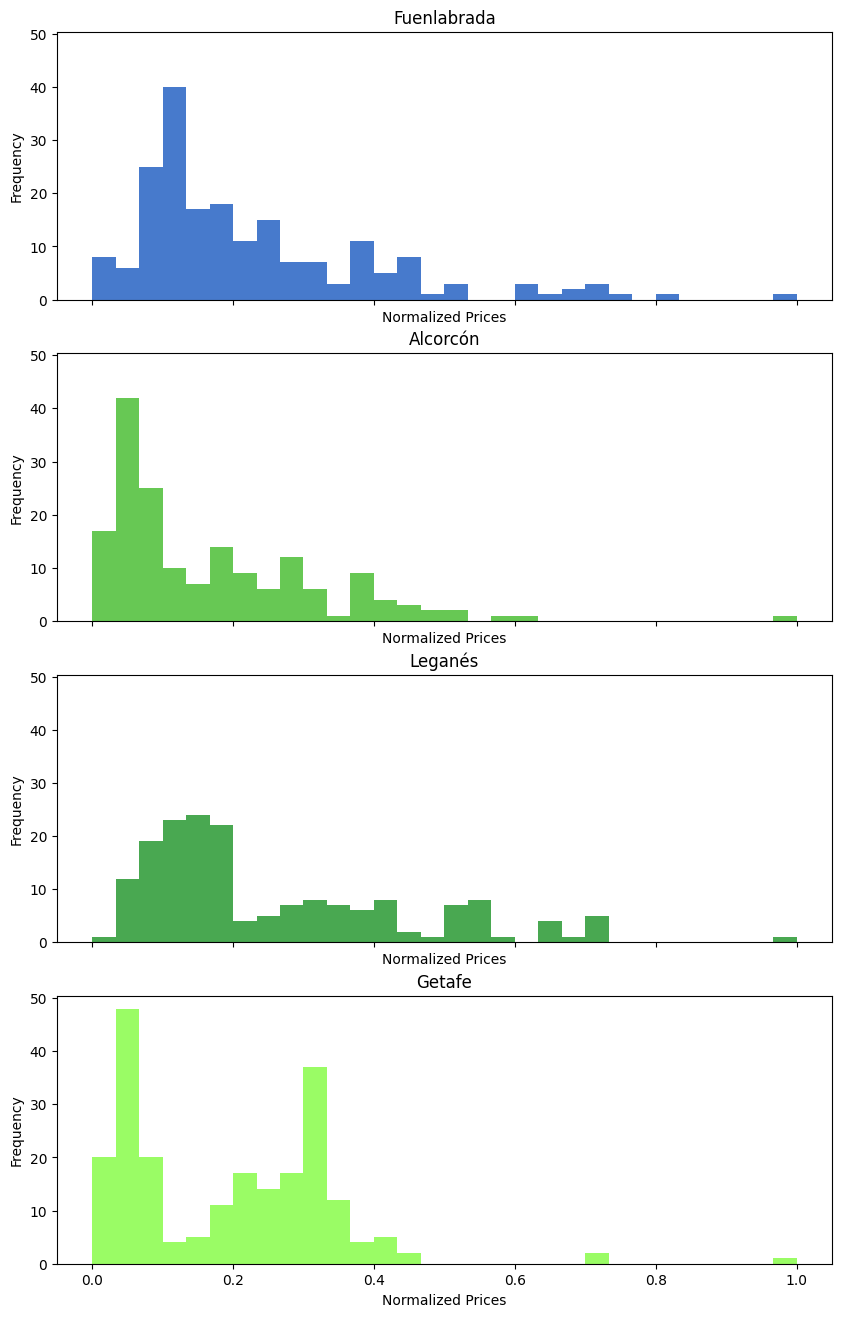

In [36]:
def normalize(df):
    return (df - df.min()) / (df.max() - df.min())

ds_southbelt['normalized_prices'] = ds_southbelt.groupby('level5')['price'].transform(normalize)

populations = ds_southbelt['level5'].unique()
num_populations = len(populations)

# Create generic plot
plt.figure(figsize=(10, 5))

# Add subsets of data to the plot
for population in populations:
    subset = ds_southbelt[ds_southbelt['level5'] == population]
    plt.hist(subset['normalized_prices'], bins=40, alpha=1, label=f'{population}')

plt.legend()
plt.xlabel('Normalized Prices')
plt.ylabel('Frequency')
plt.title('Normalized Prices for Each Population')
plt.show()

# Create new plot and subplots
fig, axs = plt.subplots(num_populations, 1, figsize=(10, 4 * num_populations), sharex=True, sharey=True)

# Plot in subplots
for i, population in enumerate(populations):
    subset = ds_southbelt[ds_southbelt['level5'] == population]
    axs[i].hist(subset['normalized_prices'], bins=30, alpha=0.75, color=np.random.rand(3,))
    axs[i].set_title(f'{population}')
    axs[i].set_xlabel('Normalized Prices')
    axs[i].set_ylabel('Frequency')


As we can see, the biggest outliers are Getafe and Leganés. Getafe being an outlier because it's the only one who has two very prominent ranges of price of houses on sale while Leganés just doesn't have any remarkable one.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in the question 14 (★★☆)

Hint: Create a new column called `pps` (price per square) and then analyse the values

C:\Users\rakus\AppData\Local\Temp\ipykernel_18532\2868836002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_southbelt['pps'] = ds_southbelt['price'] / ds_southbelt['surface']


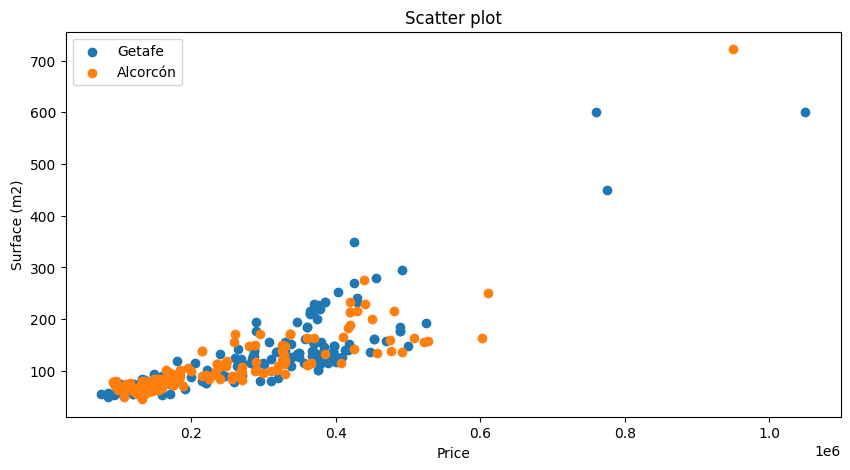

Getafe pps average: 2206.29 with 219 different houses
Alcorcón pps average: 2248.81 with 172 different houses


In [37]:
ds_southbelt['pps'] = ds_southbelt['price'] / ds_southbelt['surface']
column_check = 'level5'
population_check_get = "Getafe"
population_check_alc = "Alcorcón"
ds_getafe = ds_southbelt[ds_southbelt[column_check] == population_check_get]
ds_alcorcon = ds_southbelt[ds_southbelt[column_check] == population_check_alc]

# Create plot  
plt.figure(figsize = (10, 5))

# Plot data
plt.scatter(ds_getafe['price'], ds_getafe['surface'], label = "Getafe")
plt.scatter(ds_alcorcon['price'], ds_alcorcon['surface'], label = "Alcorcón")

plt.title("Scatter plot")
plt.xlabel("Price")
plt.ylabel("Surface (m2)")
plt.legend()
plt.show()

print(f"Getafe pps average: {round(ds_getafe['pps'].mean(),2)} with {len(ds_getafe['price'])} different houses")
print(f"Alcorcón pps average: {round(ds_alcorcon['pps'].mean(), 2)} with {len(ds_alcorcon['price'])} different houses")


Getafe and Alcorcón do have a few outliers on sale for double (even triple in Getafe's case) price than average. The rest of the spectrum is very similar which makes sense since they do both have a fairly close pps average.

#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph? You must use the subset obtained in the question 14 (★★☆) 
Hint: make a scatter plot of each population using subplots.

<function matplotlib.pyplot.show(close=None, block=None)>

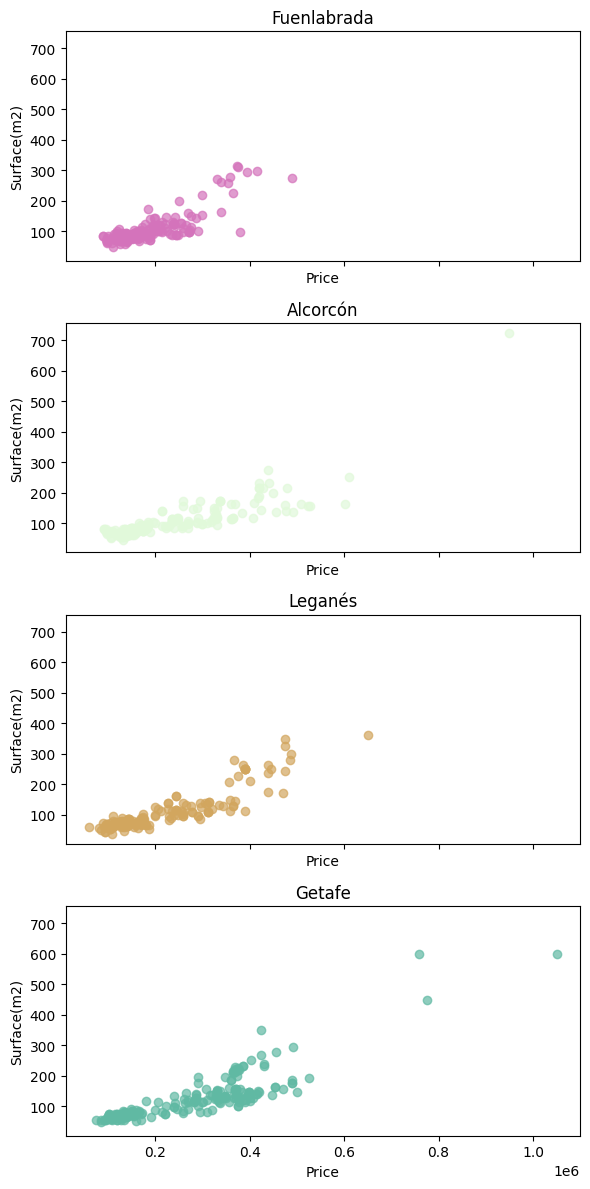

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get populations
populations = ds_southbelt['level5'].unique()
num_populations = len(populations)

# Generate subplot
fig, axes = plt.subplots(num_populations, 1, figsize=(6, 3 * num_populations), sharex=True, sharey=True)


# Generate a plot for each population
for i, population in enumerate(populations):
    subset = ds_southbelt[ds_southbelt['level5'] == population]
    ax = axes[i] if num_populations > 1 else axes
    ax.scatter(subset['price'], subset['surface'], alpha = 0.7, label = population, color=np.random.rand(3,))
    ax.set_title(f'{population}')
    ax.set_xlabel('Price')
    ax.set_ylabel('Surface(m2)')

plt.tight_layout()
plt.show

#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in the question 14) (★★★★)

Execute the following cell and then start coding in the next one. You must implement a simple code that transform the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [39]:
#Calculate avg latitude and longitude to be able to center correctly the map

# Export latitude, longitude to dictionary
coords = ds_southbelt[['latitude', 'longitude', 'level5']].to_dict(orient='list')
latitude = 0
longitude = 0
count = len(coords['latitude'])

# Add values
for key, value in coords.items():
    for i in range(len(value)):
        if key == 'latitude':
           latitude += value[i]
        if key == 'longitude':
           longitude += value[i]

# Get average    
mean_longitude = longitude / count
mean_latitude = latitude / count

print(f"Mean Latitude: {mean_latitude}")
print(f"Mean Longitude: {mean_longitude}")

Mean Latitude: 40.317853508786996
Mean Longitude: -3.7798805875538255


In [48]:
from ipyleaflet import Map, basemaps, Circle

# Map center at 40.31 et -3.78, correct zoom = 12
# Latitude, longitude
map = Map(center = (40.31, -3.78), zoom = 12, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Esri.WorldTopoMap)



In [41]:
# Add a color to each location
location_color = {
    'Fuenlabrada': 'red',
    'Alcorcón' : 'green',
    'Getafe' : 'blue',
    'Leganés' : 'yellow'
}

# Create a new column "color" in the dataset with the previous values of the dictionary
ds_southbelt['color'] = ds_southbelt['level5'].map(location_color)


C:\Users\rakus\AppData\Local\Temp\ipykernel_18532\603566110.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_southbelt['color'] = ds_southbelt['level5'].map(location_color)


I made two versions of the same code, one using dictionaries and one extracting directly from the dataset.

In [42]:
### DATASET ###


circles = []
for idx, row in ds_southbelt.iterrows():
    circle = Circle(location=(row['latitude'], row['longitude']), radius=5, color=row['color'], fill_color=row['color'])
    circles.append(circle)

for circle in circles:
    map.add_layer(circle)
    
#map

In [49]:
### DICTIONARIES ###

# Export data to dictionary with a useful format
coords_dict = {}
for idx, row in ds_southbelt.iterrows():
    loc_data= {
        'latitude': row['latitude'],
        'longitude': row['longitude'],
        'color': row['color']
    }
    coords_dict[f'{idx}'] = loc_data


# Create circle markers for each location in the coords_dict
for key, coord in coords_dict.items():
    circle = Circle(
        location=(coord['latitude'], coord['longitude']),
        radius=5,
        color=coord['color'],
        fill_color=coord['color']
    )
    map.add_layer(circle)
    
map

Map(center=[40.31, -3.78], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…